In [1]:
import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/windrose')
#sys.path.append('/Volumes/SANDISK128/Documents/Research_UiO_50/Python/windrose/')
from windrose import WindroseAxes
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python')
#sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import createFolder as cF
import math
#%matplotlib inline

In [2]:
from matplotlib import colors

import matplotlib.cm as cm

In [3]:
viridis = plt.get_cmap('viridis')
champ = 255.
no1 = np.array([79,94,26])/champ
no2 = np.array([131,156,45])/champ
no3 = np.array([71,153,112])/champ
no4 = np.array([77,111,157])/champ
no5 = np.array([157,58,55])/champ
no6 = np.array([211,120,50])/champ
no7 = np.array([218,181,70])/champ

cmap = colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7])

In [4]:
m = ['11', '12', '01', '02', '03']

In [31]:
savefig = 0
form = 'png'
figdir = '../../Figures/Weathermast'


In [24]:
for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        
        f = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc = f.variables['double_fence_accum'][:]
        
        double_fence_acc_mean = np.nanmean(double_fence_acc,axis=1)
        
        
        Series_double_fence_acc_mean = pd.Series(double_fence_acc_mean)
        
        double_fence_24diff = double_fence_acc_mean[Series_double_fence_acc_mean.last_valid_index()] - double_fence_acc_mean[Series_double_fence_acc_mean.first_valid_index()]
#        double_fence_24diff = double_fence_acc_mean[-1] - double_fence_acc_mean[0]
        
        print(year+'-'+month+'-'+day+':', double_fence_24diff)
        
        f.close()

2016-11-07: 5.684341886080802e-14
2016-11-08: -0.01333333333337805
2016-11-09: 0.30000000000001137
2016-11-10: 0.12666666666666515
2016-11-11: -0.05000000000001137
2016-11-12: 3.490000000000123
2016-11-13: 1.4766666666666879
2016-11-14: 3.433333333333337
2016-11-15: 4.443333333333328
2016-11-16: 14.660000000000025
2016-11-17: 9.016666666666652
2016-11-18: 4.793333333333351
2016-11-19: [[nan nan nan ... nan nan nan]]
2016-11-20: 0.0
2016-11-21: 0.4199999999999591
2016-11-22: 10.333333333333258
2016-11-23: 3.4500000000000455


/opt/uio/modules/packages/python/Anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


2016-11-24: 1.240000000000009
2016-11-25: -0.12000000000000455
2016-11-26: 0.2766666666666424
2016-11-27: 0.15333333333330756
2016-11-28: -0.07333333333338032
2016-11-29: 2.816666666666606
2016-11-30: 2.2700000000000955
2016-12-01: 0.10666666666679703
2016-12-02: [[nan nan nan ... nan nan nan]]
2016-12-03: [[nan nan nan ... nan nan nan]]
2016-12-04: [[nan nan nan ... nan nan nan]]
2016-12-05: 0.4599999999999227
2016-12-06: 0.2333333333333485
2016-12-07: 11.756666666666774
2016-12-08: 6.546666666666624
2016-12-09: 9.626666666666779
2016-12-10: 6.400000000000091
2016-12-11: 0.2699999999999818
2016-12-12: 0.5433333333332939
2016-12-13: 0.31666666666660603
2016-12-14: 0.31999999999993634
2016-12-15: 0.3066666666667288
2016-12-16: 0.09999999999990905
2016-12-17: 0.7033333333333758
2016-12-18: 0.016666666666765195
2016-12-19: 0.046666666666624224
2016-12-20: 0.11666666666678793
2016-12-21: 17.58333333333337
2016-12-22: 23.113333333333458
2016-12-23: 25.329999999999927
2016-12-24: 20.54333333

In [25]:
double_fence_acc = []
double_fence_acc_mean = []
wind_dir_10m = []
wind_speed_10m = []
for month in m:
    if month == '11':
        t = np.arange(8,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    f = dict()
    
    tid = dict()
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        
        f[int(year+month+day)] = netCDF4.Dataset(dirnc, 'r')
        double_fence_acc.append(f[int(year+month+day)].variables['double_fence_accum'][:])
        double_fence_acc_mean.append(np.nanmean(f[int(year+month+day)].variables['double_fence_accum'][:], axis=1))
       # double_fence_acc_mean.append(np.nanmean(double_fence_acc,axis=1))

        wind_dir_10m.append(f[int(year+month+day)].variables['10m_wind_dir_mast1'][:])
    #    tid[int(year+month+day)] = np.arange(wind_dir_10m.shape[0])

        wind_speed_10m.append(f[int(year+month+day)].variables['10m_wind_speed_mast1'][:])
        
        f[int(year+month+day)].close

/opt/uio/modules/packages/python/Anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


plot saved: ../../Figures/Weathermast/Wind_distribution_2016_2017.png


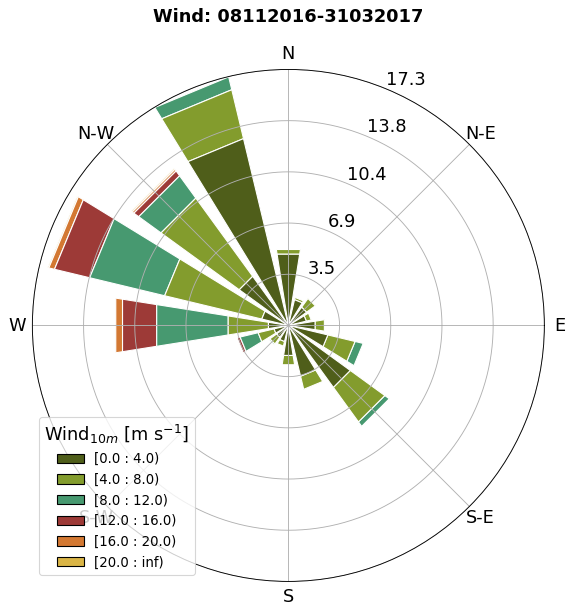

In [26]:
ax0 = WindroseAxes.from_ax()
ax0.bar(np.array(wind_dir_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       np.array(wind_speed_10m)[np.where(~ np.isnan(wind_dir_10m) )], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_distribution_2016_2017.png'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))

In [27]:
# attach the last 9 minutes from the previous day to calculate the rolling mean every 10 minutes
dofe_acc = []
wind_dir = []
wind_speed = []
for i in range(np.array(double_fence_acc_mean).shape[0]-1):
    pp = (np.concatenate((np.array(double_fence_acc_mean)[i,-9:],np.array(double_fence_acc_mean)[i+1,:])))
    dofe_acc.append(pp)
    wd = (np.concatenate((np.array(wind_dir_10m)[i,-9:], np.array(wind_dir_10m)[i+1,:])))
    wind_dir.append(wd)
    ws = (np.concatenate((np.array(wind_speed_10m)[i,-9:], np.array(wind_speed_10m)[i+1,:])))
    wind_speed.append(ws)

In [28]:
# Calculate the moving average. That is, take
# the first ten values, average them, 
# then drop the first and add the eleventh, etc.
dofe_acc = pd.DataFrame(np.array(dofe_acc)[:,9:])
dofe_acc_rolling = dofe_acc.rolling(window=10,axis=1).mean()
dofe_acc_rolling = dofe_acc_rolling.values

wind_dir = pd.DataFrame(np.array(wind_dir)[:,9:])
wind_dir_rolling = wind_dir.rolling(window=10,axis=1).mean()
wind_dir_rolling = wind_dir_rolling.values

wind_speed = pd.DataFrame(np.array(wind_speed)[:,9:])
wind_speed_rolling = wind_speed.rolling(window=10,axis=1).mean()
wind_speed_rolling = wind_speed_rolling.values

In [29]:
diff = np.empty(shape=(np.array(dofe_acc_rolling)[:,9:].shape))#/60))
diff[:] =  np.nan

#for i in np.arange(np.array(double_fence_acc_mean).shape[0]):#/60):
for i in range(0,np.array(dofe_acc_rolling)[:,9:].shape[1]-1):
    diff[:,int(i)] = np.array(dofe_acc_rolling)[:,9+int(i)+1] - np.array(dofe_acc_rolling)[:,9+int(i)]

/opt/uio/modules/packages/python/Anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/opt/uio/modules/packages/python/Anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until


plot saved: ../../Figures/Weathermast/Wind_precip_events_2016_2017


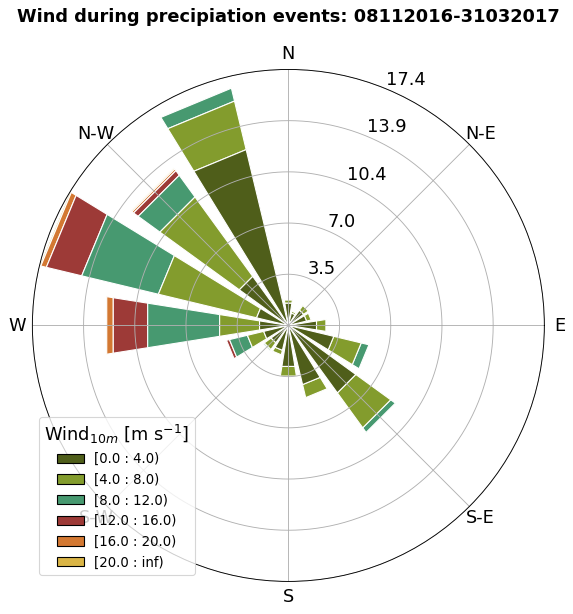

In [30]:
ax0 = WindroseAxes.from_ax()
ax0.bar(wind_dir_rolling[np.logical_and(~np.isnan(dofe_acc_rolling), dofe_acc_rolling >= 0.)], 
        wind_speed_rolling[np.logical_and(~np.isnan(dofe_acc_rolling), dofe_acc_rolling >= 0.)], 
       normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4))
ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_title('Wind during precipiation events: 08112016-31032017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'Wind_precip_events_2016_2017'
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
    print('plot saved: %s/%s' %(figdir,fig_name))

In [13]:
def arange_daily(RR_1):
    
    var = [] 
### arange daily values in an array    
    for i in range(0,int(RR_1.shape[0]/24)-1):
        var.append(RR_1[i*24:(i+1)*24+1])

    var = np.array(var)
    return(var)

def valid_values(RR_1):
    var = arange_daily(RR_1)
### mask missing values with NaN
    for i in range(0,int(var.shape[0])):

        idx = np.where(var[i,:] == -9999)
        var[i,idx] = np.nan
        
    return(var)

In [ ]:
station = 'Haukeliseter'
#year = 2016
#month = 12
#day = 21

for month in m:
    if month == '11':
        t = np.arange(7,31)
    if month == '12' or month == '01' or month == '03':
        t = np.arange(1,32)
    if month == '02':
        t = np.arange(1,29)
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            

In [135]:
year = 2017
month = '01'
day = 29

easterlies: 19.884999999999877
westerlies: 3.415000000000191
total: 23.300000000000068
easterlies: 18.1
westerlies: 5.6000000000000005
total: 23.700000000000003


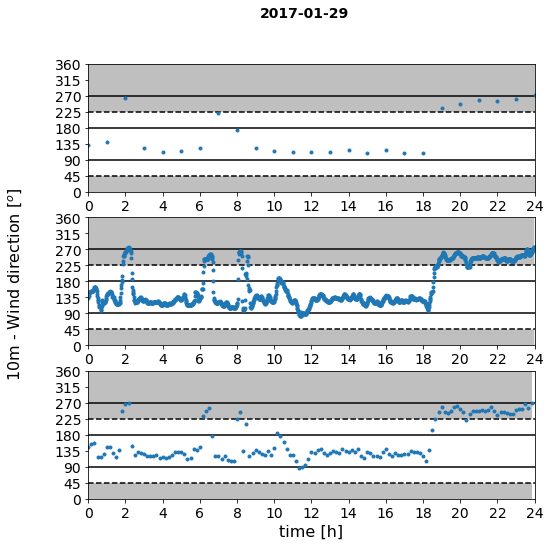

In [136]:
        dirnc = '../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day)
        txt_dir      = '../../Data/Eklima/'+station
        txt_filename = 'obs_'+str(year)+str(month)

        #f1 = netCDF4.Dataset('../../Data/Weathermast/Met_%s%s%s_Haukeliseter.nc' %(year,month,day-1))
        f = netCDF4.Dataset(dirnc, 'r')



        double_fence_acc = f.variables['double_fence_accum'][:]
        double_fence_acc_mean = np.nanmean(double_fence_acc,axis=1)

        wind_dir_10m = f.variables['10m_wind_dir_mast1'][:]
        tid = np.arange(wind_dir_10m.shape[0])

        wind_speed_10m = f.variables['10m_wind_speed_mast1'][:]

        diff = np.empty(shape=int(double_fence_acc_mean.shape[0]))#/60))
        diff[:] =  np.nan

        for i in np.arange(double_fence_acc_mean.shape[0]-1):#/60):
            diff[int(i)] = double_fence_acc_mean[int(i)+1] -double_fence_acc_mean[int(i)]

        print('easterlies:', np.nansum(diff[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)]))

        print('westerlies:', np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)]))

        print('total:', np.nansum(diff[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)]) + \
        np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)]))

        tt = np.arange(wind_dir_10m.shape[0])
        (tt[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)])/60

        (tt[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)])/60

        k = np.arange(0,wind_dir_10m.shape[0]+10,10)
    #    k = np.arange(0,wind_dir_10m.shape[0]+30,30)
     #   k = np.arange(0,wind_dir_10m.shape[0]+60,60)

        rrdd = np.deg2rad(wind_dir_10m)
        wd_deg = []
        ws = []
        for l in range(k.shape[0]-1):
            totrx = 0.0
            totry = 0.0
            for i in np.arange(k[l], k[l+1]):
                totrx = (wind_speed_10m[i]*(math.sin(rrdd[i]))) + totrx
                totry = (wind_speed_10m[i]*(math.cos(rrdd[i]))) + totry
    


            if totry == 0.0:
                r_dir = 0
            else:
                r_dir = math.atan(totrx/totry) # avg r_wind dir
            if totry < 0.:
                r_dir = r_dir + np.pi

            wd_deg.append(np.rad2deg(r_dir))
    
            ws.append(np.sqrt( (totrx**2 + totry**2)/10**2 ))
        for i in range(np.array(wd_deg).shape[0]):
            if np.array(wd_deg)[i] < 0:
                (wd_deg)[i] = 360. + (wd_deg)[i]

        f.close()

        Haukeli = pd.read_csv(txt_dir+'/'+txt_filename+'.txt', sep =';', header=19, skipfooter = 2, engine = 'python')

        #year  = Haukeli['Year']
        #month = Haukeli['Mnth']
        #date  = Haukeli['Date']
        time  = Haukeli['Time(UTC)']

        obsvar = Haukeli['RR_1'].astype(float)         # Precipitation (1 hour); [mm]

        obsvar_DD = Haukeli['DD'].astype(float)             # Wind direction (FF); [degrees]
        obsvar_FF = Haukeli['FF'].astype(float)             # Wind speed (10 meters above ground);m/s

        obsvar0 = valid_values(obsvar)

        obsvar0_DD = valid_values(obsvar_DD)
        obsvar0_FF = valid_values(obsvar_FF)

        RR_1 = np.empty(shape=(obsvar0.shape[0], obsvar0.shape[1]+1))
        RR_1[:,:] = np.nan

        DD = np.empty(shape=(obsvar0_DD.shape[0], obsvar0_DD.shape[1]+1))
        DD[:,:] = np.nan

        for d in range(0,obsvar0.shape[0]):
            RR_1[int(d)-1,:] = np.append(obsvar0[int(d)-1,:], obsvar0[int(d),0])
            DD[int(d)-1,:] = np.append(obsvar0_DD[int(d)-1,:], obsvar0_DD[int(d),0])

        print('easterlies:', np.nansum(obsvar0[int(day)-1,np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
                                            obsvar0_DD[int(day)-1,:] < 225)]))

        print('westerlies:', np.nansum(obsvar0[int(day)-1,np.logical_or(np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
                                            obsvar0_DD[int(day)-1,:] <= 360),
                                            obsvar0_DD[int(day)-1,:] <  45 )]))

        print('total:', np.nansum(obsvar0[int(day)-1,np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
                                            obsvar0_DD[int(day)-1,:] < 225)]) + \
        np.nansum(obsvar0[int(day)-1,np.logical_or(np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
                                            obsvar0_DD[int(day)-1,:] <= 360),
                                            obsvar0_DD[int(day)-1,:] <  45 )]))

        tt = time[0:25]
        #tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
         #                                           obsvar0_DD[int(day)-1,:] < 225)]

        #tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
         #                                           obsvar0_DD[int(day)-1,:] <= 360,
          #                                          obsvar0_DD[int(day)-1,:] <  45 )]




##########################################################################################################################
        fig = plt.figure(figsize=(8,8))

        fig.text(.0, .5, '10m - Wind direction [$^{o}$]', ha='center', va='center', rotation='vertical', fontsize = 16)

        ax1 = fig.add_subplot(311)
        ax1.plot(obsvar0_DD[int(day)-1,:],'.')
        ax1.hlines(270,0,obsvar0_DD.shape[1])
        ax1.hlines(180,0,obsvar0_DD.shape[1])
        ax1.hlines(90,0,obsvar0_DD.shape[1])
        ax1.hlines(45,0,obsvar0_DD.shape[1], linestyles='dashed')
        ax1.hlines(225,0,obsvar0_DD.shape[1], linestyles='dashed')

        ax1.fill_between(np.arange(obsvar0_DD.shape[1]), 225, 360,  facecolor='gray', alpha=0.5)
        ax1.fill_between(np.arange(obsvar0_DD.shape[1]), 0, 45,  facecolor='gray', alpha=0.5)

        ax1.set_xlim([0, obsvar0_DD.shape[1]-1])
        ax1.set_ylim([0, 360])
        ax1.set_xticks(np.arange(0.,obsvar0_DD.shape[1],2))
        ax1.set_yticks(np.arange(0,405,45))
        fig.suptitle("%s-%s-%s" %(year,month,day), fontsize=14,fontweight='bold')
        ax1.tick_params(labelsize=14)
        #######################################################################################################
        ax2 = fig.add_subplot(312)
        ax2.plot(wind_dir_10m,'.')
        ax2.hlines(270,0,wind_dir_10m.shape[0])
        ax2.hlines(180,0,wind_dir_10m.shape[0])
        ax2.hlines(90,0,wind_dir_10m.shape[0])
        ax2.hlines(45,0,wind_dir_10m.shape[0], linestyles='dashed')
        ax2.hlines(225,0,wind_dir_10m.shape[0], linestyles='dashed')

        ax2.fill_between(np.arange(wind_dir_10m.shape[0]), 225, 360,  facecolor='gray', alpha=0.5)
        ax2.fill_between(np.arange(wind_dir_10m.shape[0]), 0, 45,  facecolor='gray', alpha=0.5)

        ax2.set_xlim([0, wind_dir_10m.shape[0]])
        ax2.set_ylim([0, 360])
        ax2.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120))
        ax2.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        #ax.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ax2.set_yticks(np.arange(0,405,45))
        ax2.tick_params(labelsize=14)
        #######################################################################################################
        ax3 = fig.add_subplot(313)
        wd_deg = np.asarray(wd_deg)
        ax3.plot(wd_deg,'.')
        ax3.hlines(270,0,wd_deg.shape[0])
        ax3.hlines(180,0,wd_deg.shape[0])
        ax3.hlines(90,0,wd_deg.shape[0])
        ax3.hlines(45,0,wd_deg.shape[0], linestyles='dashed')
        ax3.hlines(225,0,wd_deg.shape[0], linestyles='dashed')

        ax3.fill_between(np.arange(wd_deg.shape[0]), 225, 360,  facecolor='gray', alpha=0.5)
        ax3.fill_between(np.arange(wd_deg.shape[0]), 0, 45,  facecolor='gray', alpha=0.5)

        ax3.set_xlim([0, wd_deg.shape[0]-12])
        ax3.set_ylim([0, 360])
        ax3.set_xticks(np.arange(0,wd_deg.shape[0]+12,12))
        ax3.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ##ax.set_xticks(np.arange(0,wind_dir_10m.shape[0]+120,120), [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24 ])
        ax3.set_yticks(np.arange(0,405,45))
        ax3.tick_params(labelsize=14)

        plt.xlabel('time [h]', fontsize=16)
        if savefig == 1:
            cF.createFolder('%s/10m_wind/' %(figdir))
            fig_name = '%s%s%s.png' %(year,month,day)
            plt.savefig('%s/10m_wind/%s' % (figdir, fig_name), format = form, bbox_inches='tight')
            print('plot saved: %s/%s' %(figdir,fig_name))
        else:
            plt.show()
        plt.close()

In [143]:
a[np.logical_or(np.logical_and((wind_dir_10m[:] >= 225), 
                             (wind_dir_10m[:] < 360)), 
              wind_dir_10m[:] <45)]

array([ 111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  373,  374,  375,  376,
        377,  378,  379,  380,  381,  382,  383,  384,  385,  386,  387,
        388,  389,  390,  391,  392,  393,  394,  395,  396,  397,  398,
        399,  400,  401,  484,  485,  486,  487,  488,  489,  490,  491,
        492,  493,  494,  495,  512,  513,  514,  515,  516, 1127, 1128,
       1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139,
       1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150,
       1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161,
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172,
       1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183,
       1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194,
       1195, 1196, 1197, 1198, 1199, 1200, 1201, 12

In [144]:
a[np.logical_and(wind_dir_10m[:] >= 45, 
                wind_dir_10m[:] < 225)]

array([   0,    1,    2, ..., 1228, 1229, 1230])

In [155]:
seconds = 1439
m, s = divmod(seconds, 60)
h, m = divmod(m, 60)

print('{:d}:{:02d}:{:02d}'.format(h, m, s)) # Python 3

0:23:59


In [157]:
np.arange(5,wind_dir_10m.shape[0],10)

array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
        115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  215,
        225,  235,  245,  255,  265,  275,  285,  295,  305,  315,  325,
        335,  345,  355,  365,  375,  385,  395,  405,  415,  425,  435,
        445,  455,  465,  475,  485,  495,  505,  515,  525,  535,  545,
        555,  565,  575,  585,  595,  605,  615,  625,  635,  645,  655,
        665,  675,  685,  695,  705,  715,  725,  735,  745,  755,  765,
        775,  785,  795,  805,  815,  825,  835,  845,  855,  865,  875,
        885,  895,  905,  915,  925,  935,  945,  955,  965,  975,  985,
        995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095,
       1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205,
       1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315,
       1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425,
       1435])

In [449]:
i = 370

In [450]:
print(sum(wind_dir_10m[i-15:i] >= 45),
      wind_dir_10m[i-15:i] >= 45,
      sum(wind_dir_10m[i-15:i] < 225),
      wind_dir_10m[i-15:i] < 225)

15 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True] 15 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [451]:
# if last 15min more westerly
# test easterly
easterly_minus15 = np.sum(np.logical_and(wind_dir_10m[i-15:i] >= 45,wind_dir_10m[i-15:i] < 225))
print(easterly_minus15)

easterly_plus15 = np.sum(np.logical_and(wind_dir_10m[i:i+15] >= 45,wind_dir_10m[i:i+15] < 225))
easterly_plus15

15


3

In [452]:
# test westerly
westerly_minus15 = np.sum(np.logical_or(np.logical_and(wind_dir_10m[i-15:i] >= 225, wind_dir_10m[i-15:i] < 360), wind_dir_10m[i-15:i] < 45))
print(westerly_minus15)

westerly_plus15 = np.sum(np.logical_or(np.logical_and(wind_dir_10m[i:i+15] >= 225, wind_dir_10m[i:i+15] < 360), wind_dir_10m[i:i+15] < 45))
westerly_plus15

0


12

In [453]:
easterly_minus5 = np.sum(np.logical_and(wind_dir_10m[i-5:i] >= 45,wind_dir_10m[i-5:i] < 225))
print(easterly_minus5)

easterly_plus5 = np.sum(np.logical_and(wind_dir_10m[i:i+5] >= 45,wind_dir_10m[i:i+5] < 225))
print(easterly_plus5)

westerly_minus5 = np.sum(np.logical_or(np.logical_and(wind_dir_10m[i-5:i] >= 225, wind_dir_10m[i-5:i] < 360), wind_dir_10m[i-5:i] < 45))
print(westerly_minus5)

westerly_plus5 = np.sum(np.logical_or(np.logical_and(wind_dir_10m[i:i+5] >= 225, wind_dir_10m[i:i+5] < 360), wind_dir_10m[i:i+5] < 45))
westerly_plus5

5
3
0


2

In [454]:
if westerly_minus15 > easterly_minus15  and westerly_plus15 > easterly_plus15:
    if (100/30)*(westerly_minus15+westerly_plus15) >= 80:
        print('westerlies:', np.nansum(diff[i-5:i+5]))

In [455]:
if easterly_minus15 > westerly_minus15 and easterly_plus15 > westerly_plus15:
    if (100/30)*(easterly_minus15+easterly_plus15) >= 80:
        print('easterlies:', np.nansum(diff[i-5:i+5]))

In [457]:
if easterly_minus15 > westerly_minus15 and westerly_plus15 > easterly_plus15:
    if 100/15*westerly_plus15 >= 80:
        print('True')

In [460]:
100/15*easterly_minus15

100.0

In [463]:
100/5*westerly_plus5

40.0

In [437]:
westerly_minus15 > easterly_minus15 and easterly_plus15 > westerly_plus15

False

In [353]:
if (100/30)*(westerly_minus15+westerly_plus15) > 80:
    print('westerlies:', np.nansum(diff[i-15:i+15]) )

In [354]:
if (100/30)*(easterly_minus15+easterly_plus15) > 80:
    print('easterlies:', np.nansum(diff[i-15:i+15]) )

In [338]:
if (100/10)*(westerly_minus5+westerly_plus5) == 50:
    print('westerlies:', np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[i-5:i+5] >= 225,
                                            wind_dir_10m[i-5:i+5] <= 360),
                             wind_dir_10m[:] < 45)]))

westerlies: 0.07999999999992724


In [349]:
if (100/10)*(easterly_minus5+easterly_plus5) == 50:
    print('easterlies:', np.nansum(diff[i-5:i+5][np.logical_and(wind_dir_10m[i-5:i+5] >= 45,
                              wind_dir_10m[i-5:i+5] < 225)]) )

easterlies: 0.024999999999977263


In [ ]:
print('easterlies:', np.nansum(diff[np.logical_and(wind_dir_10m[:] >= 45,
                              wind_dir_10m[:] < 225)]))

        print('westerlies:', np.nansum(diff[np.logical_or(np.logical_and(wind_dir_10m[:] >= 225,
                                            wind_dir_10m[:] <= 360),
                             wind_dir_10m[:] < 45)]))

In [276]:
easterly_minus15 > westerly_minus15

True

In [277]:
westerly_plus15 > easterly_plus15

True

In [283]:
if (100/15)*easterly_minus15 > 80:
    print('easterlies:', np.nansum(diff[i-15:i+15]))

True

In [285]:
(100/15)*westerly_plus15 > 80

False

15

In [215]:
print(sum(wind_dir_10m[i-10:i] >= 45),
      wind_dir_10m[i-10:i] >= 45,
      sum(wind_dir_10m[i-10:i] < 225),
      wind_dir_10m[i-10:i] < 225)

10 [ True  True  True  True  True  True  True  True  True  True] 1 [ True False False False False False False False False False]


In [203]:
print(wind_dir_10m[i-5:i] >= 45,
      wind_dir_10m[i-5:i] < 225)

[ True  True  True  True  True] [False False False False False]


In [234]:
print(sum(wind_dir_10m[i:i+5] >= 45),
      wind_dir_10m[i:i+5] >= 45,
      sum(wind_dir_10m[i:i+5] < 225),
      wind_dir_10m[i:i+5] < 225)

5 [ True  True  True  True  True] 0 [False False False False False]


In [205]:
print(sum(wind_dir_10m[i:i+10] >= 45),
      wind_dir_10m[i:i+10] >= 45,
      sum(wind_dir_10m[i:i+10] < 225),
      wind_dir_10m[i:i+10] < 225)

10 [ True  True  True  True  True  True  True  True  True  True] 10 [ True  True  True  True  True  True  True  True  True  True]


In [231]:
print(sum(wind_dir_10m[i:i+15] >= 45),
      wind_dir_10m[i:i+15] >= 45,
      sum((wind_dir_10m[i:115+15] < 225)),
      wind_dir_10m[i:i+15] < 225)

15 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True] 0 [False False False False False False False False False False False False
 False False False]


In [ ]:
print('easterlies:', tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 45,
                                            obsvar0_DD[int(day)-1,:] < 225)])
print('westerlies:', tt[np.logical_and(obsvar0_DD[int(day)-1,:] >= 225,
                                            obsvar0_DD[int(day)-1,:] <= 360,
                                            obsvar0_DD[int(day)-1,:] <  45 )])